# S06T01: Tasca dades, probabilitats i estadístiques
## - Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

<font color='blue'>Per aquesta tasca utilitzarem el dataset "basketball.csv" el qual reuneix les estadistiques de jugadors de basquet de diferents lligues. Vegem com ens trobem la versio inicial del dataframe:

In [433]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

basket = pd.read_csv(r"basketball.csv")
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

<font color='blue'>Es tracta d'una taula de 33 atributs, amb gaire be 54.000 entrades (files). Per simplificar, agafarem una mostra de 5400 entrades i n'extraurem les conclusions. Mes endavant veurem si podem atribuir les conclusions al conjunt de la poblacio o no. Per fer el sampling utilitzarem el metode <b>simple random</b>.

In [434]:
basket.dropna(inplace=True)
basket = basket.sample(5400, replace=True, random_state=42)
basket

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
45394,NBA,2018 - 2019,Playoffs,Austin Rivers,HOU,10,215.4,27,62,16,...,"Aug 1, 1992",6-4,193.0,200.0,91.0,United States,Winter Park High School,1.0,10.0,New Orleans Pelicans
51844,NBA,2019 - 2020,Regular_Season,Donte DiVincenzo,MIL,66,1520.4,232,510,83,...,"Jan 31, 1997",6-4,193.0,203.0,92.0,United States,Salesianum School,1.0,17.0,Milwaukee Bucks
1323,NBA,2001 - 2002,Playoffs,Anthony Peeler,MIN,3,67.0,9,20,5,...,"Nov 25, 1969",6-4,193.0,208.0,94.0,United States,Paseo Academy,1.0,15.0,Los Angeles Lakers
26990,NBA,2014 - 2015,Regular_Season,Richard Jefferson,DAL,74,1244.2,144,324,66,...,"Jun 21, 1980",6-7,201.0,233.0,106.0,United States,Moon Valley High School,1.0,13.0,Houston Rockets
26099,German-BBL,2014 - 2015,International,Jon Brockman,LUD,32,896.0,154,275,0,...,"Mar 20, 1987",6-7,201.0,255.0,116.0,United States,Snohomish Senior High School,2.0,8.0,Portland Trail Blazers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35572,NBA,2016 - 2017,Playoffs,Kawhi Leonard,SAS,12,429.1,106,202,25,...,"Jun 29, 1991",6-7,201.0,230.0,104.0,United States,Martin Luther King High School,1.0,15.0,Indiana Pacers
93,NBA,1999 - 2000,Regular_Season,Mookie Blaylock,GSW,73,2449.0,327,837,101,...,"Mar 20, 1967",6-1,185.0,190.0,86.0,United States,Garland High School,1.0,12.0,New Jersey Nets
9507,NBA,2008 - 2009,Playoffs,Derrick Rose,CHI,7,313.4,59,120,0,...,"Oct 4, 1988",6-3,191.0,200.0,91.0,United States,Simeon Career Academy,1.0,1.0,Chicago Bulls
14988,NBA,2011 - 2012,Playoffs,Eric Bledsoe,LAC,11,188.9,37,63,3,...,"Dec 9, 1989",6-1,185.0,205.0,93.0,United States,Parker High School,1.0,18.0,Oklahoma City Thunder


<font color='blue'>L'exercici 1 ens demana seleccionar un atribut per fer-ne estadistiques. Una caracteristica particular del mon del basket es l'alsada dels seus jugadors comparat amb altres esports. Triem, doncs, l'atribut <b>height_cm</b> per dur a terme l'exercici.

count    5400.000000
mean      200.418519
std         8.700658
min       160.000000
25%       193.000000
50%       201.000000
75%       206.000000
max       229.000000
Name: height_cm, dtype: float64
median    201.0
mode    206.0


/Users/paullarripa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(224.0, 0.023, 'std: 8.7')

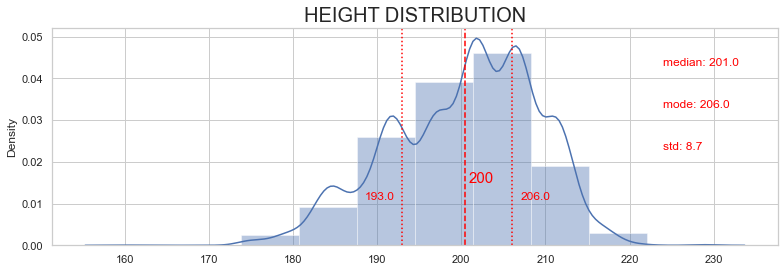

In [435]:
heights = basket.height_cm
sns.set_style("whitegrid")
ax1 = sns.distplot(x=heights, bins=10, kde=True, )    #grafic
sns.set(rc={"figure.figsize":(13, 4)}) #width=3, #height=4
plt.title("HEIGHT DISTRIBUTION", fontsize=20)

#creation of parameters
mean = heights.describe()[1]
std = heights.describe()[2]
q1 = heights.describe()[4]
median = heights.describe()[5]
q3 = heights.describe()[6]
mode = heights.mode()[0]

print(heights.describe())
print("median   ", median)
print("mode   ", mode)

#creation of annotations and labels
plt.axvline(mean, 0 ,1, ls='--', c='red')    # mean
plt.axvline(q1, 0 ,1, ls=':', c='red')   # Q1
plt.axvline(q3, 0 ,1, ls=':', c='red')   # Q2
ax1.annotate(q1, xy=(q1-4.5,0.011), color='red')
ax1.annotate(int(mean), xy=(mean+0.5,0.015), color='red', fontsize=15)
ax1.annotate(q3, xy=(q3+1,0.011), color='red')
m= "median: "+str(median)
ax1.annotate(m, xy=(q3+18,0.043), color='red')
m= "mode: "+str(mode)
ax1.annotate(m, xy=(q3+18,0.033), color='red')
m= "std: "+str(round(std, 2))
ax1.annotate(m, xy=(q3+18,0.023), color='red')

<font color='blue'>Com podem observar, les dades responen a una distribucio aproximadament normal, on la mitjana aritmetica es troba als 200 cm d'alsada, amb una desviacio estandar de 8.7 cm. La mediana es molt propera a la mitjana, amb valor de 201. I la moda es troba sorprenentment als 206 cm. 

## - Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

<font color='blue'>Centrem-nos ara en la correlacio que podria existir entre l'alsada dels jugadors i el numero de rebots que registren. Seguirem utilitzant la mateixa mostra que hem fet servir anteriorment.

,height_cm,REB
height_cm,1.00000,0.33868
REB,0.33868,1.00000


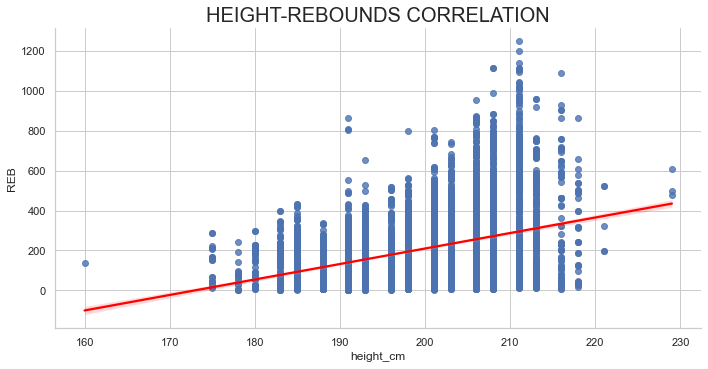

In [436]:
#plot
sns.set_style("whitegrid")  
sns.lmplot(data=basket, x="height_cm", y="REB", aspect=2, line_kws={'color': 'red'})
sns.set(rc={"figure.figsize":(13, 4)})
plt.title("HEIGHT-REBOUNDS CORRELATION", fontsize=20)

#correlation coeficient
basket[["height_cm","REB"]].corr(method="pearson")

<font color='blue'>La correlacio entre l'alsada dels jugadors i el nombre de rebots que registren es bastant visible segons el grafic generat. No obstant, el coeficient de correlacio es de 0.33. Naturalment es troba per sobre del 0, pero no pas aprop del valor 1. Aixo ens fa entendre que, efectivament, un jugador alt es mes propens a fer rebots que un de baix, pero que hi ha jugadors d'alsada mitja, baixa que tambe en fan, no es exclusiu dels jugadors alts.

## - Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

<AxesSubplot:>

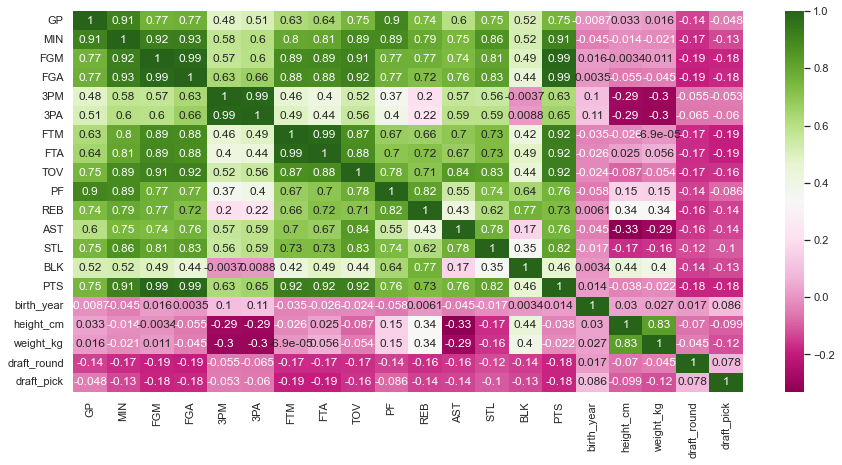

In [437]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(basket.drop(["weight","ORB","DRB"], axis=1).corr(), cmap="PiYG", annot=True)

<font color='blue'>El heatmap de correlacio ens mostra clarament quins atributs afecten directament a altres. Per destacar-ne alguns filtrarem aquells que tenen una correlacio de +/- 0.75%:

<AxesSubplot:>

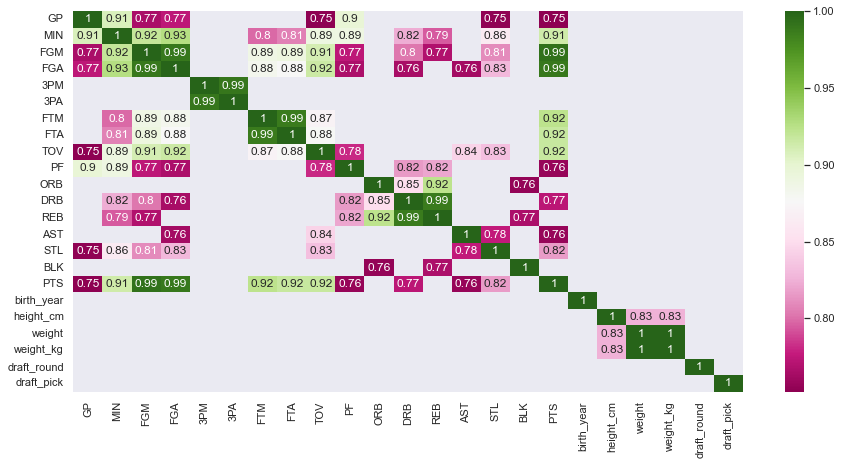

In [438]:
x = basket.corr()[(basket.corr()>0.75)|(basket.corr()<-0.75)]
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(x, cmap="PiYG", annot=True)

<font color='blue'>Un dels atributs que mes s'afecten son els minuts jugats i els tirs/punts fets (cc 0.925). Naturalment els jugadors que mes juguen son els que es tirs fan i anoten. <br>Tambe cal destacar la alta correlacio entre els STL (steals, robades) i els punts anotats (cc 0.82), donat que els jugadors que roben una pilota la majoria de les vegades acaben anotant punts. <br>Tambe podem veure altres coficients de correlacio alts que son mes esperables com ara la relacio pes-alsada (0.83). <br>Una altra forta correlacio a destacar es la dels blocks (o taps) amb els rebots.

## - Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [447]:
#GEOMETRIC MEAN
from scipy.stats import gmean
print("GEOMETRIC MEAN: ", round(gmean(basket.height_cm),2))


#HARMONIC MEAN
def harmean(series):
    n=0
    harmean = 0
    for s in series:
        harmean = harmean + 1/s
        n+=1
    harmean = n/harmean
    return harmean 

print("HARMONIC MEAN:  ", round(harmean(basket.height_cm),2))
## we could also do:
# import statistics
# print(statistics.harmonic_mean(basket.height_cm))

GEOMETRIC MEAN:  200.23
HARMONIC MEAN:   200.03


<font color='blue'>Finalment, hem tornat a utilitzar l'alsada com a atribut per calcular les mitjes geometrica i harmonica. Amb valors molt propers a la mitja aritmetica calculada anteriorment (200), la geometrica ha donat un resultat de 200.23; i l'harmonica un valor de 200.03.